# ARMA Model

In [21]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters
from time import time

# Catfish Sales Data

In [2]:
def perser(s):
    return datetime.strptime(s , "%Y-%m-%d")

In [3]:
df = pd.read_csv("catfish.csv")
df

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239
...,...,...
319,2012-8-01,14442
320,2012-9-01,13422
321,2012-10-01,13795
322,2012-11-01,13352


In [4]:
catfish_df = pd.read_csv("catfish.csv", parse_dates = [0], index_col = 0, squeeze = True, date_parser = perser)
catfish_df

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 324, dtype: int64

In [5]:
# Infer the frequency of the data
catfish_df = catfish_df.asfreq(pd.infer_freq(catfish_df.index))
catfish_df

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, Length: 324, dtype: int64

In [6]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
catfish_sales = catfish_df[start_date:end_date]

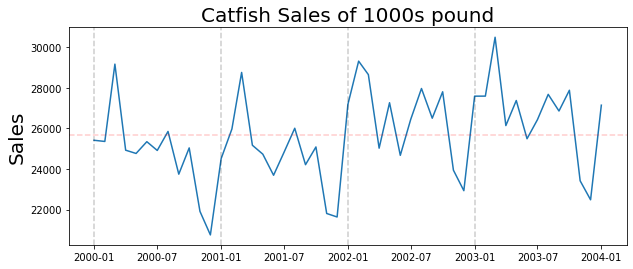

In [7]:
plt.figure(figsize = (10,4))
plt.plot(catfish_sales)
plt.title("Catfish Sales of 1000s pound", fontsize = 20)
plt.ylabel("Sales", fontsize = 20)

for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+ "-01-01"), color = "k", linestyle = "--", alpha= 0.2)
    
plt.axhline(catfish_sales.mean(), color = "r", linestyle = "--", alpha = 0.2)

In [8]:
first_diff = catfish_sales.diff()[1:]

In [18]:
first_diff.describe()

count      48.000000
mean       36.000000
std      2496.467163
min     -4459.000000
25%     -1545.750000
50%       -28.000000
75%      1341.750000
max      5538.000000
Name: Total, dtype: float64

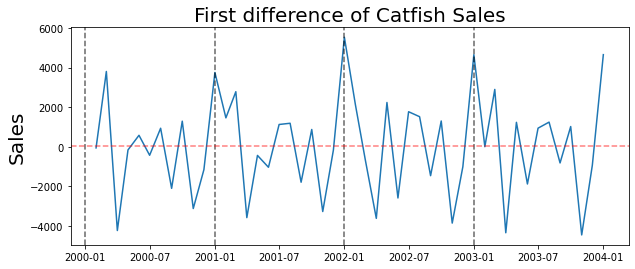

In [16]:
## plotting the first difference

plt.figure(figsize = (10,4))
plt.plot(first_diff)
plt.title("First difference of Catfish Sales", fontsize = 20)
plt.ylabel("Sales", fontsize = 20)

for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), color = "k", linestyle = "--", alpha = 0.6)
    
plt.axhline(first_diff.mean(), color = "r", linestyle = "--", alpha = 0.5)

# Plotting ACF 

<BarContainer object of 20 artists>

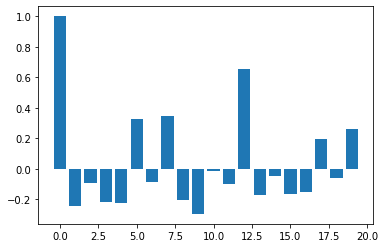

In [22]:
num_lags = 20
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

In [26]:
# num_lags = 25
# pacf_vals = pacf(first_diff)
# #n_lags = 25
# plt.bar(range(num_lags), pacf_vals[:num_lags])

# Get the training and testing sets

In [27]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days = 1): test_end]

# Fit the ARMA Model 

In [29]:
model = ARMA(train_data, order = (4,1))

In [31]:
# Fit the model

start = time()
model_fit = model.fit()
end = time()
print("Model Fitting Time: ", end - start)

Model Fitting Time:  0.36533427238464355


In [32]:
# Summary
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   42
Model:                     ARMA(4, 1)   Log Likelihood                -376.584
Method:                       css-mle   S.D. of innovations           1850.781
Date:                Thu, 25 Nov 2021   AIC                            767.167
Time:                        00:34:19   BIC                            779.331
Sample:                    02-01-2000   HQIC                           771.626
                         - 07-01-2003                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.2904    129.751      0.287      0.774    -217.017     291.598
ar.L1.Total    -0.8666      0.185     -4.692      0.000      -1.229      -0.505
ar.L2.Total    -0.4236      0.166     -2.547    

# The ARMA Model is :

$\hat{y_t} = -0.87y_{t-1} - 0.42y_{t-2} - 0.56y_{t-3} - 0.61y_{t-4} + 0.52\varepsilon_{t-1}$

# Prediction

In [33]:
# get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


In [35]:
#get the prediction and residuals

pred = model_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data - pred

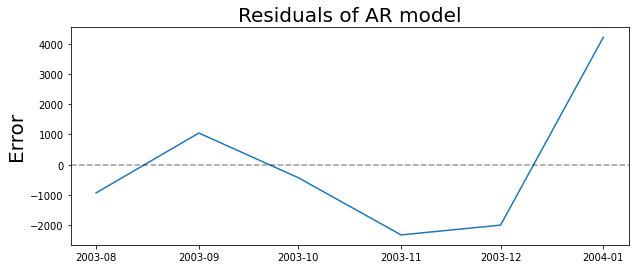

In [37]:
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title("Residuals of AR model", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.axhline(0, color = "k", linestyle = "--", alpha = 0.4)

Text(0, 0.5, 'Sales')

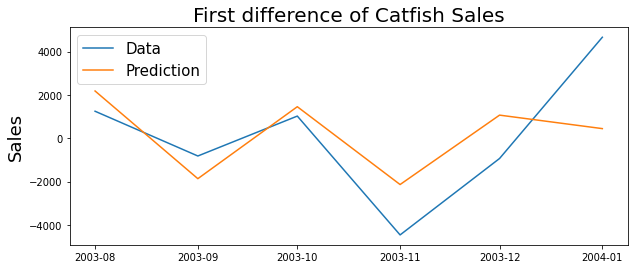

In [38]:
#Plotting test data and prediction

plt.figure(figsize = (10,4))

plt.plot(test_data)
plt.plot(pred)

plt.legend(("Data", "Prediction"), fontsize = 15)

plt.title("First difference of Catfish Sales", fontsize = 20)
plt.ylabel("Sales", fontsize = 18)

In [39]:
print("RMSE :", np.sqrt(np.mean(residuals**2)))

RMSE : 2210.272740744307
